<h3>Introduction</h3>
<b>Restricted Boltzmann Machine (RBM):</b>  RBMs are shallow neural nets that learn to reconstruct data by themselves in an unsupervised fashion.  


<h4>Why are RBMs important?</h4>
An RBM is a basic form of autoencoder.  It can automatically extract <b>meaningful</b> features from a given input.


<h4>How does it work?</h4>
RBM is a 2 layer neural network. Simply, RBM takes the inputs and translates those into a set of binary values that represents them in the hidden layer. Then, these numbers can be translated back to reconstruct the inputs. Through several forward and backward passes, the RBM will be trained, and a trained RBM can reveal which features are the most important ones when detecting patterns.   


<h4>What are the applications of an RBM?</h4>
RBM is useful for <a href='http://www.cs.utoronto.ca/~hinton/absps/netflixICML.pdf'>  Collaborative Filtering</a>, dimensionality reduction, classification, regression, feature learning, topic modeling and even <b>Deep Belief Networks</b>.

<h4>Is RBM a generative or Discriminative model?</h4>
RBM is a generative model.

<b>Discriminative:</b> Consider a classification problem where we want to learn to distinguish between Sedan cars (y = 1) and SUV cars (y = 0), based on some features of cars. Given a training set, an algorithm like logistic regression tries to find a straight line, or <i>decision boundary</i>, that separates the suv and sedan.  

<b>Generative:</b> looking at cars, we can build a model of what Sedan cars look like. Then, looking at SUVs, we can build a separate model of what SUV cars look like. Finally, to classify a new car, we can match the new car against the Sedan model, and match it against the SUV model, to see whether the new car looks more like the SUV or Sedan. 

Generative Models specify a probability distribution over a dataset of input vectors. We can carry out both supervised and unsupervised tasks with generative models:
<ul>
    <li>In an unsupervised task, we try to form a model for $P(x)$, where $P$ is the probability given $x$ as an input vector.</li>
    <li>In the supervised task, we first form a model for $P(x|y)$, where $P$ is the probability of $x$ given $y$(the label for $x$). For example, if $y = 0$ indicates that a car is an SUV, and $y = 1$ indicates that a car is a sedan, then $p(x|y = 0)$ models the distribution of SUV features, and $p(x|y = 1)$ models the distribution of sedan features. If we manage to find $P(x|y)$ and $P(y)$, then we can use <b>Bayes rule</b> to estimate $P(y|x)$, because:   
        $$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$$</li>
</ul>



<a id="ref2"></a>
<h3>RBM layers</h3>

An RBM has two layers. The first layer of the RBM is called the <b>visible</b> (or input layer). Imagine that our toy example, has only vectors with 7 values, so the visible layer must have $V=7$ input nodes. 
The second layer is the <b>hidden</b> layer, which has $H$ neurons in our case. Each hidden node takes on values of either 0 or 1 (i.e., $h_i = 1$ or $h_i$ = 0), with a probability that is a logistic function of the inputs it receives from the other $V$ visible units, called for example, $p(h_i = 1)$. For our toy sample, we'll use 2 nodes in the hidden layer, so $H = 2$.

<center><img src="https://ibm.box.com/shared/static/eu26opvcefgls6vnwuo29uwp0nudmokh.png" alt="RBM Model" style="width: 400px;"></center>


     

Each node in the first layer also has a <b>bias</b>. We will denote the bias as $v_{bias}$, and this single value is shared among the $V$ visible units.

The <b>bias</b> of the second is defined similarly as $h_{bias}$, and this single value among the $H$ hidden units.


<a id="ref3"></a>
<h3>What RBM can do after training?</h3>
Think of RBM as a model that has been trained based on images of a dataset of many SUV and sedan cars. Also, imagine that the RBM network has only two hidden nodes, where one node encodes the weight and, and the other encodes the size.  
In a sense, the different configurations represent different cars, where one is an SUV and the other is Sedan.  In a training process, through many forward and backward passes, the RBM adjust its weights to send a stronger signal to either the SUV node (0, 1) or the sedan node (1, 0) in the hidden layer, given the pixels of images. Now, given an SUV in hidden layer, which distribution of pixels should we expect? RBM can give you 2 things. First, it encodes your images in hidden layer. Second, it gives you the probability of observing a case, given some hidden values.


<h3>The Inference Process</h3>

RBM has two phases:
<ul>
    <li>Forward Pass</li>  
    <li>Backward Pass or Reconstruction</li>
</ul>

<b>Phase 1) Forward pass:</b>  

Input one training sample (one image) $\mathbf{x}$ through all visible nodes, and pass it to all hidden nodes. Processing happens in each node in the hidden layer. This computation begins by making stochastic decisions about whether to transmit that input or not (i.e. to determine the state of each hidden layer).  First, the probability vector is computed using the input feature vector $\mathbf{x}$, the weight matrix $\mathbf{W}$, and the bias term $h_{bias}$, as 


$$p({h_j}|\mathbf x)= \sigma( \sum_{i=1}^V W_{ij} x_i + h_{bias} )$$, 

where $\sigma(z) = (1+e^{-z})^{-1}$ is the logistic function.


So, what does $p({h_j})$ represent? It is the <b>probability distribution</b> of the hidden units. That is, RBM uses inputs $x_i$ to make predictions about hidden node activations. For example, imagine that the hidden node activation values are [0.51 0.84] for the first training item. It tells you that the conditional probability for each hidden neuron for Phase 1 is: 

$$p(h_{1} = 1|\mathbf{v}) = 0.51$$
$$p(h_{2} = 1|\mathbf{v}) = 0.84$$

As a result, for each row in the training set, vector of probabilities is generated.  In TensorFlow, this is referred to as a `tensor` with a shape of (1,2). 

We then turn unit $j$ with probability $p(h_{j}|\mathbf{v})$, and turn it off with probability $1 - p(h_{j}|\mathbf{v})$ by generating a uniform random number vector $\mathbf{\xi}$, and comparing it to the activation probability as 

<center>If $\xi_j>p(h_{j}|\mathbf{v})$, then $h_j=1$, else $h_j=0$.</center>


Therefore, the conditional probability of a configuration of $\mathbf{h}$ given $\mathbf{v}$ (for a training sample) is:

$$p(\mathbf{h} \mid \mathbf{v}) = \prod_{j=1}^H p(h_j \mid \mathbf{v})$$


where $H$ is the number of hidden units.



<b>Phase 2) Backward Pass (Reconstruction):</b>
The RBM reconstructs data by making several forward and backward passes between the visible and hidden layers.

So, in the second phase (i.e. reconstruction phase), the samples from the hidden layer (i.e. $\mathbf h$) becomes the input in the backward pass. The same weight matrix and visible layer biases are used to passed to the sigmoid function. The reproduced output is a reconstruction which is an approximation of the original input.


RBM learns a probability distribution over the input, and then, after being trained, the RBM can generate new samples from the learned probability distribution. As you know, <b>probability distribution</b>, is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment.

The (conditional) probability distribution over the visible units v is given by

$$p(\mathbf{v} \mid \mathbf{h}) = \prod_{i=1}^V p(v_i \mid \mathbf{h}),$$


where,

$$p(v_i \mid \mathbf{h}) = \sigma\left(\sum_{j=1}^H W_{ji} h_j + v_{bias} \right)$$

so, given current state of hidden units and weights, what is the probability of generating [1. 0. 0. 1. 0. 0. 0.] in reconstruction phase, based on the above <b>probability distribution</b> function?


### What is the objective function?

<h2>Goal</h2>
 <b>Maximize the liklihood of our data being drawn from that distribution</b>
<h2>Error Calculation</h2>
In each epoch, the "error" is computed as a sum of the squared difference between step 1 and step n, i.e the difference between the original data and it's reconstruction
<br>The Mean Square Error(MSE)


In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Flatten

In [11]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

<h2>Training the model</h2>
In order to train the RBM, the goal is to maximize the product of probabilities assigned to all rows <b>v</b> in the training set <b>V</b>(a matrix) 
$$\arg \max_W \prod_{\mathbf{v}\in\mathbf{V}_T} p(\mathbf{v})$$

this is equivalent to maximizing the expectation of the log probability,
$$\arg\max_W\left[ \mathbb{E} \left(\prod_{\mathbf v\in \mathbf V}\text{log} \left(p(\mathbf v)\right) \right) \right]$$


so the approach is to update the weights $W_{ij}$ to increase <b>p(v)</b> for all <b>v</b>, so we need to calculate the derivative
$$\frac{\partial \log p(\mathbf v)}{\partial W_{ij}}$$

This cannot be implemented using the usual gradient descent algorithm, so another approach is used that includes: 
<ol>
    <li>Gibbs Sampling</li>
    <li>Contrastive Divergence</li>
</ol>

<h4>Gibbs Sampling Step 1</h4> 
Given an input vector $\mathbf{v}$, we are using $p(\mathbf{h}|\mathbf{v})$ to predict the hidden values $\mathbf{h}$. 
  $$p({h_j}|\mathbf v)= \sigma\left(\sum_{i=1}^V W_{ij} v_i + h_{bias} \right)$$
The samples are generated from this distribution by generating the uniform random variate vector $\mathbf{\xi} \sim U[0,1]$ of length $H$ and comparing to the computed probabilities as


<center>If $\xi_j>p(h_{j}|\mathbf{v})$, then $h_j=1$, else $h_j=0$.</center>


<h4>Gibbs Sampling Step 2</h4> 
Then, knowing the hidden values, we use $p(\mathbf v| \mathbf h)$ for reconstructing of new input values v. 

   $$p({v_i}|\mathbf h)= \sigma\left(\sum_{j=1}^H W^{T}_{ij} h_j + v_{bias} \right)$$


The samples are generated from this distribution by generating a uniform random variate vector $\mathbf{\xi} \sim U[0,1]$ of length $V$ and comparing to the computed probabilities as

<center>If $\xi_i>p(v_{i}|\mathbf{h})$, then $v_i=1$, else $v_i=0$.</center>

Let vectors $\mathbf v_k$ and $\mathbf h_k$ be for the $k$th iteration.  In general, the $kth$ state is generrated as: 


    
<b>Iteration</b> $k$: 

$$\mathbf v_{k-1} \Rightarrow p(\mathbf h_{k-1}|\mathbf v_{k-1})\Rightarrow \mathbf h_{k-1}\Rightarrow p(\mathbf v_{k}|\mathbf h_{k-1})\Rightarrow \mathbf v_k$$       
    
<h3>Contrastive Divergence (CD-k)</h3>
The update of the weight matrix is done during the Contrastive Divergence step. 

Vectors v0 and vk are used to calculate the activation probabilities for hidden values h0 and hk. The difference between the outer products of those probabilities with input vectors v0 and vk results in the update matrix:


$$\Delta \mathbf W_k =\mathbf v_k \otimes \mathbf h_k - \mathbf v_{k-1} \otimes \mathbf h_{k-1}$$

Contrastive Divergence is actually matrix of values that is computed and used to adjust values of the $\mathbf W$ matrix. Changing $\mathbf W$ incrementally leads to training of the  $\mathbf W$ values. Then, on each step (epoch), $\mathbf W$ is updated using the following:

$$\mathbf W_k = \mathbf W_{k-1} + \alpha * \Delta \mathbf W_k$$

In [12]:
(train_X, train_y), (test_X, test_y)= mnist.load_data()
flatten = Flatten(dtype='float32')
train_X = flatten(train_X/ 255.0)
train_y = flatten(train_y/255.0)

2024-11-23 14:07:22.287232: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-23 14:07:22.408749: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-23 14:07:22.412052: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [13]:
def create_batches(data, label, batch_size):
    num_samples = len(data)
    num_batches = num_samples // batch_size
    if num_samples % batch_size != 0:
        num_batches += 1
    batches = []
    for i in range(num_batches):
        start_index = i * batch_size
        end_index = min((i+1) * batch_size, num_samples)#last batch ko lagi if num_samples % batch_size != 0 
        batch_data = data[start_index:end_index]
        batch_label = label[start_index:end_index]
        batches.append((batch_data, batch_label))
    return batches

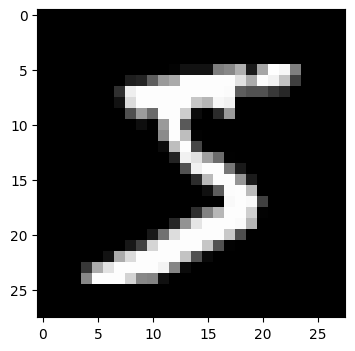

In [14]:
a = train_X[0].numpy().reshape(28, 28)
plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.imshow(a, cmap = "gray")

In [15]:
print(train_X.shape)

(60000, 784)


In [26]:
from tqdm import tqdm  # Import tqdm for progress bars

class RBM:
    def __init__(self, n_visible, n_hidden): 
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.v0_state = tf.Variable(tf.zeros([n_visible]), tf.float32)
        self.h0_state = tf.Variable(tf.zeros([n_hidden]), tf.float32)
        self.hb = tf.Variable(tf.zeros([n_hidden]), tf.float32)
        self.vb = tf.Variable(tf.zeros([n_visible]), tf.float32)
        self.W = tf.Variable(tf.zeros([n_visible, n_hidden]), tf.float32)
        self.errors = []
        self.weights = []

    def hidden_layer(self, v_state):
        h_prob = tf.nn.sigmoid(tf.matmul([v_state], self.W) + self.hb) 
        h_state = tf.nn.relu(tf.sign(h_prob - tf.random.uniform(tf.shape(h_prob)))) 
        return h_state

    def reconstructed_output(self, h_state):
        v_prob = tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(self.W)) + self.vb) 
        v_state = tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))
        return v_state[0]

    def predict_reconstruct(self, h_state):
        v_prob = tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(self.W)) + self.vb)
        return v_prob

    def error(self, v0_state, v1_state):
        return tf.reduce_mean(tf.square(v0_state - v1_state))

    def train(self, train_ds, learning_rate=0.01, epochs=5, batchsize=32):
        batch_number = 0
        K = 1  # Set K to 1 for now
        
        # Loop through epochs
        for epoch in range(epochs):
            # Using tqdm to show progress for each epoch
            with tqdm(train_ds, total=len(train_ds)) as pbar:
                for batch_x, batch_y in pbar: 
                    batch_number += 1
                    for i_sample in range(batchsize):
                        for k in range(K):
                            v0_state = batch_x[i_sample]
                            h0_state = self.hidden_layer(v0_state)
                            v1_state = self.reconstructed_output(h0_state)
                            h1_state = self.hidden_layer(v1_state)

                            delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                            self.W = self.W + learning_rate * delta_W
                        
                            delta_vb = tf.reduce_mean(v0_state - v1_state, axis=0)
                            delta_hb = tf.reduce_mean(h0_state - h1_state, axis=0) 
                            self.vb = self.vb + learning_rate * delta_vb
                            self.hb = self.hb + learning_rate * delta_hb
                            
                            v0_state = v1_state

                    if i_sample == batchsize - 1:
                        err = self.error(batch_x[i_sample], v1_state)
                        self.errors.append(err)
                        self.weights.append(self.W)
                        # Update the progress bar description
                        pbar.set_postfix({'epoch': epoch + 1, 'error': f'{err:.6f}'})

            # Print summary after each epoch
            print(f'Epoch {epoch+1}/{epochs} completed. Final reconstruction error: {err:.6f}')
    
    def save_model(self, filepath):
        variables = { 'W':self.W.numpy(), 
                     'vb':self.vb.numpy(), 
                     'hb':self.hb.numpy()}
        np.savez(filepath, **variables)

    def plot_error(self):
        plt.plot(self.errors)
        plt.xlabel("Batch Number")
        plt.ylabel("Error")
        plt.title("Reconstruction Error Over Time")
        plt.show()

    @classmethod
    def load_model(cls, filepath):
        data = np.load(filepath)
        model = cls(data['W'].shape[0], data['W'].shape[1])
        model.W.assign(data['W'])
        model.vb.assign(data['vb'])
        model.hb.assign(data['hb'])
        return model 
    
    def predict(self, input_data):
        reconstructed_data = []
        for sample in input_data:
            v0_state = sample
            h0_state = self.hidden_layer(v0_state)
            v1_state = self.predict_reconstruct(h0_state)
            v0_state = v1_state
            reconstructed_data.append(v1_state.numpy())
        return np.array(reconstructed_data)


In [27]:
train_ds = \
    tf.data.Dataset.from_tensor_slices((train_X, train_y)).batch(200).prefetch(tf.data.experimental.AUTOTUNE)

In [28]:
rbm_mnist  = RBM(28*28, 50)
rbm_mnist.train(train_ds, batchsize=200)


100%|██████████████████████████████| 300/300 [02:19<00:00,  2.16it/s, epoch=1, error=0.068944]


Epoch 1/5 completed. Final reconstruction error: 0.068944


100%|██████████████████████████████| 300/300 [02:21<00:00,  2.13it/s, epoch=2, error=0.064502]


Epoch 2/5 completed. Final reconstruction error: 0.064502


100%|██████████████████████████████| 300/300 [02:22<00:00,  2.11it/s, epoch=3, error=0.078338]


Epoch 3/5 completed. Final reconstruction error: 0.078338


100%|██████████████████████████████| 300/300 [02:23<00:00,  2.09it/s, epoch=4, error=0.055694]


Epoch 4/5 completed. Final reconstruction error: 0.055694


100%|██████████████████████████████| 300/300 [02:24<00:00,  2.07it/s, epoch=5, error=0.088627]

Epoch 5/5 completed. Final reconstruction error: 0.088627


In [47]:
# rbm_mnist.save_model('mnist1.npz')

In [66]:
rbm_mnist = RBM.load_model('mnist_model1.npz')

In [67]:
from utils import tile_raster_images
from PIL import Image
# image = Image.fromarray(tile_raster_images(X =W.numpy().T[10:11], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
# ### Plot image
# plt.rcParams['figure.figsize'] = (4.0, 4.0)
# imgplot = plt.imshow(image)
# imgplot.set_cmap('gray')  

In [68]:
import csv

In [69]:
def read_csv_to_matrix(file_path):
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        matrix = [list(map(int, row)) for row in reader]
    return np.array(matrix)

In [70]:
im1 = read_csv_to_matrix("matrix.csv")

In [71]:
im1.shape
im1.dtype

dtype('int64')

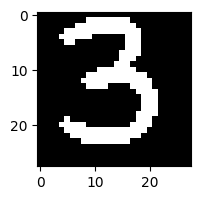

In [72]:
im = Image.fromarray(tile_raster_images(X=im1.reshape(1, -1).astype(np.float64), img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (2.0, 2.0)
imgplot = plt.imshow(im)
imgplot.set_cmap('gray') 

In [73]:
imtoin = im1.reshape(1, -1).astype(np.float32)

In [74]:
out1 = rbm_mnist.predict(imtoin)

In [75]:
out1.shape

(1, 1, 784)

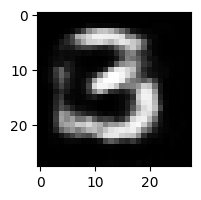

In [76]:
img = Image.fromarray(tile_raster_images(X=out1[0], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (2.0, 2.0)
imgplot = plt.imshow(img)
imgplot.set_cmap('gray') 

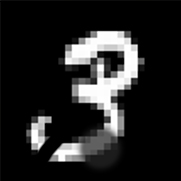

In [77]:
img = Image.open('destructed3.jpg')
img

In [78]:
# convert the image to a 1d numpy array
sample_case = np.array(img.convert('I').resize((28,28))).ravel().reshape((1, -1))/255.0
print(sample_case.shape)
sample_case = tf.cast(sample_case, dtype=tf.float32)




(1, 784)


In [79]:
output = rbm_mnist.predict(sample_case)

In [80]:
type(output)

numpy.ndarray

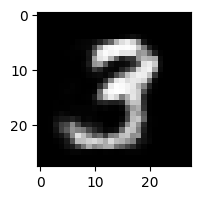

In [81]:
img = Image.fromarray(tile_raster_images(X=output[0], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (2.0, 2.0)
imgplot = plt.imshow(img)
imgplot.set_cmap('gray') 

In [82]:
loaded_model = RBM.load_model("mnist_model.npz")
vv1_p = loaded_model.predict(train_X[1].numpy().reshape(1, -1))
print(vv1_p.shape)


(1, 1, 784)


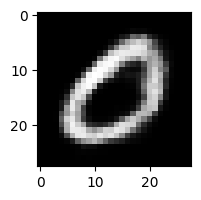

In [83]:
img = Image.fromarray(tile_raster_images(X=vv1_p[0], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (2.0, 2.0)
imgplot = plt.imshow(img)
imgplot.set_cmap('gray') 